# Notebook for making a exploratory data analysis 
    - 0ª Overview business problem
    - 1ª Create descriptive statistics
    - 2ª Create business hypothesis
    - 3ª Testing business hypothesis

# Business problem:

The following statement is a fictitious problem:

Telco SA is a telecommunications company located in Canada, which lately has been trying problems, they **don't know what they know is with the company's measurements**, **we don't know how to take advantage and retain customers** or even identify the **customers' consumption patterns**. Your **current costs with ways of trying to retain customers are BRL 200,000.00**

**Key problem points to attack:**

**Problems with customers (Chur)**
- **Does not know the measures of the company**
- **We don't know how to leverage and retain customers**
- **Your current costs with customer campaigns of BRL 200.000.00**

**I will seek the solution of the problems described above in addition to trying to reduce these costs of Telco SA with Data Science techniques.**

**What is a company's churn?**

The **churn** is the percentage of customers who request the cancellation of the contracted service within a certain time interval.

**How ​​to calculate your business churn rate?**

The simplest formula to measure it is to divide the number of lost customers in a month by the number that there was no start of the month, and multiply by 100.

For example: we have 500 contacts, at the end of the month we identify 30 casualties, the churn rate will be 6%.

# Business hypothesis

- Churn customers who have a monthly contract are the majority !

- Churn customers who are married are the majority!

- Churn customers who have phone service are the majority!

- Churn customers who do not have Device Protection are the majority!

- Churn customers who have a Payment Method such as Electronic Check are the majority!

# Libs

In [1]:
# open source librares
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

import klib
import phik
import sys

In [2]:
# configs
pd.set_option('display.max.columns', 50)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# my functions
# config path scripts
sys.path.insert(0, r'C:\Users\erico\Documents\projeto classificacao\Telco-Customer-Churn\scripts')

from extract_data import read_data
from cramer_v_analysis import cramers_V

# Get data

In [4]:
# get dataset by Telco SA customer churn

# path to read specific csv data
path = r'C:\Users\erico\Documents\projeto classificacao\Telco-Customer-Churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = read_data(path)

df2 = df.copy()

In [5]:
# Print first rows of dataframe
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data overview

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# check duplicateds
df2.duplicated().sum()

0

In [8]:
# check null fields
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 - So what for data sanity check ?
    - data not null
    - data not duplicated

# Calculate Churn in the data
- The simplest formula for measuring it is to divide the number of lost customers in a month by the number there were at the beginning of the month, and multiply by 100.
- Churn / No Churn * 100 

In [9]:
pct_churn = round( len(df2.query("Churn == 'Yes' ")) / len(df2.query("Churn == 'No' ")) * 100, 2)

In [10]:
print(f'The percent of churn in Telco SA now is: {pct_churn}%')

The percent of churn in Telco SA now is: 36.12%


# 1ª - Descriptive analysis
    - Make a statistic report from dataset

- Report functions

In [11]:
def make_stats_df(df:pd.DataFrame)-> pd.DataFrame:

    """ Function creates statistical report of an entire dataframe
        Receive:
            df - pandas dataframe with float or int type columns
        Returns:
            pandas dataframe and save Excel report in a data path
    """
    # filtra tipo de dados para int ou float antes da operação 
    df = df.select_dtypes(exclude=['object','datetime64'])

    # tendência central
    mean_ = pd.DataFrame(df.apply(np.mean)).T
    median_ = pd.DataFrame(df.apply(np.median)).T

    # dispersão e posição
    std_ = pd.DataFrame(df.apply( np.std ) ).T
    min_ = pd.DataFrame(df.apply( np.min )).T
    max_ = pd.DataFrame(df.apply( np.max )).T
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min() ) ).T
    skew_ = pd.DataFrame(df.apply(lambda x: x.skew() )).T
    kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis() )).T          

    # concatenate     
    stats_df = pd.concat([min_, max_, range_, mean_, median_, std_, skew_, kurtosis_]).T.reset_index()
    stats_df.columns = ['Features','Min','Max','Range','Mean','Median','Std','Skew','Kurtosis']

    return stats_df #.to_excel(r'C:\Users\erico\Documents\projeto-churn\Telco-Customer-Churn\reports\Statistic_report_from_number_variables.xlsx', index=True), print('Report save in data path reports/ !')

 - Get general report statistics for numeric variables

In [12]:
# generate report statistic with function
df_number_report = make_stats_df(df2)

In [13]:
# Access dataframe report
df_number_report

,Features,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,tenure,0.00,72.00,72.0,32.371149,29.00,24.557737,0.239540,-1.387372
1,MonthlyCharges,18.25,118.75,100.5,64.761692,70.35,30.087911,-0.220524,-1.257260
2,TotalCharges,0.00,8684.80,8684.8,2279.734304,1394.55,2266.633539,0.963235,-0.228580


 - So what dataframe number report:
    - not insigths know but on MonthlyCharges the range is $100.05 !

 - Get general statistics for categorics variables

In [14]:
# select categorical data
df_categorical_report = df2.describe(exclude=['number']).T

In [15]:
# generate a new column with percent of variables frequence
df_categorical_report['pct'] = df_categorical_report['freq'] / df_categorical_report['count'] * 100

In [16]:
df_categorical_report

,count,unique,top,freq,pct
customerID,7043,7043,7590-VHVEG,1,0.014198
gender,7043,2,Male,3555,50.47565
SeniorCitizen,7043,2,No,5901,83.785319
Partner,7043,2,No,3641,51.69672
Dependents,7043,2,No,4933,70.041176
PhoneService,7043,2,Yes,6361,90.316626
MultipleLines,7043,3,No,3390,48.132898
InternetService,7043,3,Fiber optic,3096,43.95854
OnlineSecurity,7043,3,No,3498,49.666335
OnlineBackup,7043,3,No,3088,43.844952


In [17]:
# store Excel with categorical report
#df_categorical_report.to_excel(r'C:\Users\erico\Documents\projeto-churn\Telco-Customer-Churn\reports\Statistic_report_from_categorical_variables.xlsx', index=True)

 - So what categorical report 

    - Male predomine in 50.47% in the dataset Female 49,53% is balanced gender;
    - Just over half of the base (51.69%) is not married;
    - 70.04% of the base has no dependent;
    - 90.31% of the base has telephone services;
    - Less than half of the base has multiple phone lines (48.13%);
    - 43.95% Of the internet services are fiber optics;
    - 49.66% of the customer don't have a OnlineSecurity;
    - 43.84 of the customer don't have a OnlineBackup;
    - 43.94% of the customer don't have a DeviceProtection;
    - 49.31% of the customer don't have a TechSupport;
    - 39.89% of the customer don't have a StreamingTV;
    - 39.54% of the customer don't have a StreamingMovies;
    - 55.01% the contract is Month-to-month;
    - 59.22% of the payments is PaperlessBilling;
    - 33.57% of the PaymentMethod is Electronic chec;
    - 73.46% of the customer not is Churn;

## Multivariate analysis

 - Pearson correlation in numeric variables
 - Phik correlation
 - Cramer V correlation [reference](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

### - Pearson correlation

<Axes: title={'center': 'Feature-correlation (pearson)'}>

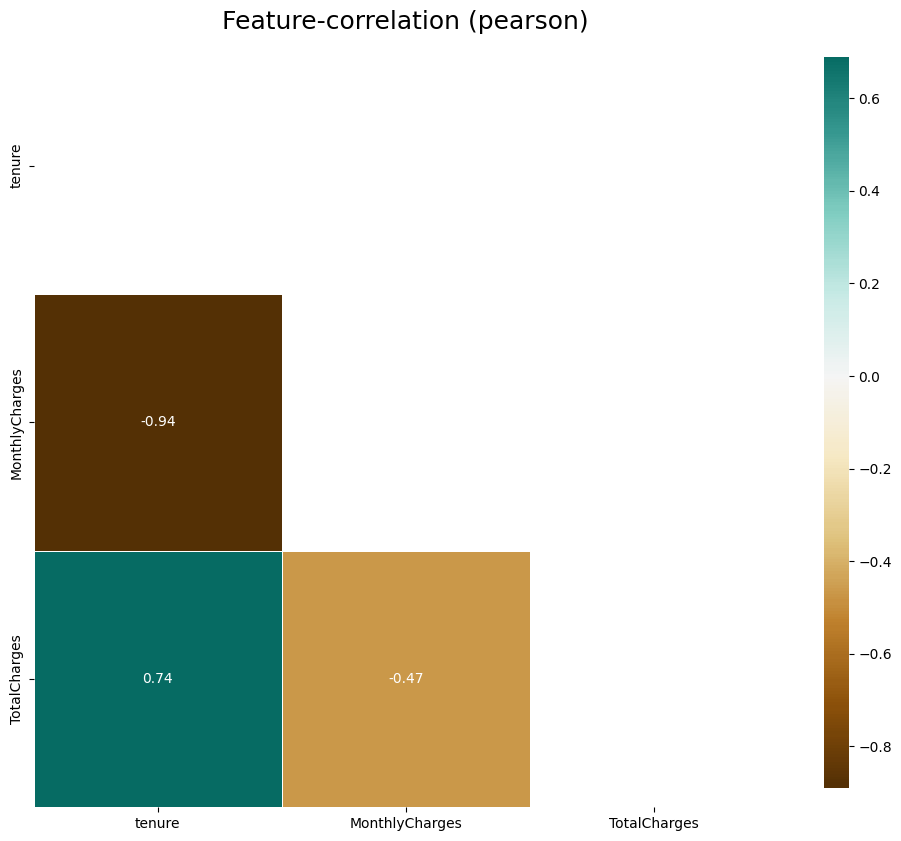

In [18]:
# correlation plot with numeric variables
df_corr = df2.select_dtypes(exclude='object')
df_corr = df_corr.corr(method='pearson')
klib.corr_plot(df_corr)

    - TotalCharges is correlated with tenure, the number of tenure impact in total cust
    - MonthlyCharges is correlated with TotalCharges, both motive the tenure

### - Phik correlation in all variables (mixed correlation with no linear dependence)

In [19]:
# The combined features of Phi_K form an advantage over existing coefficients. 
# First, it works consistently between categorical, ordinal and interval variables. Second, it captures non-linear dependency.
#  Third, it reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution. 
# These are useful features when studying the correlation matrix of variables with mixed types.

# mixed correlation
df2_corr_phik = df2.phik_matrix()

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


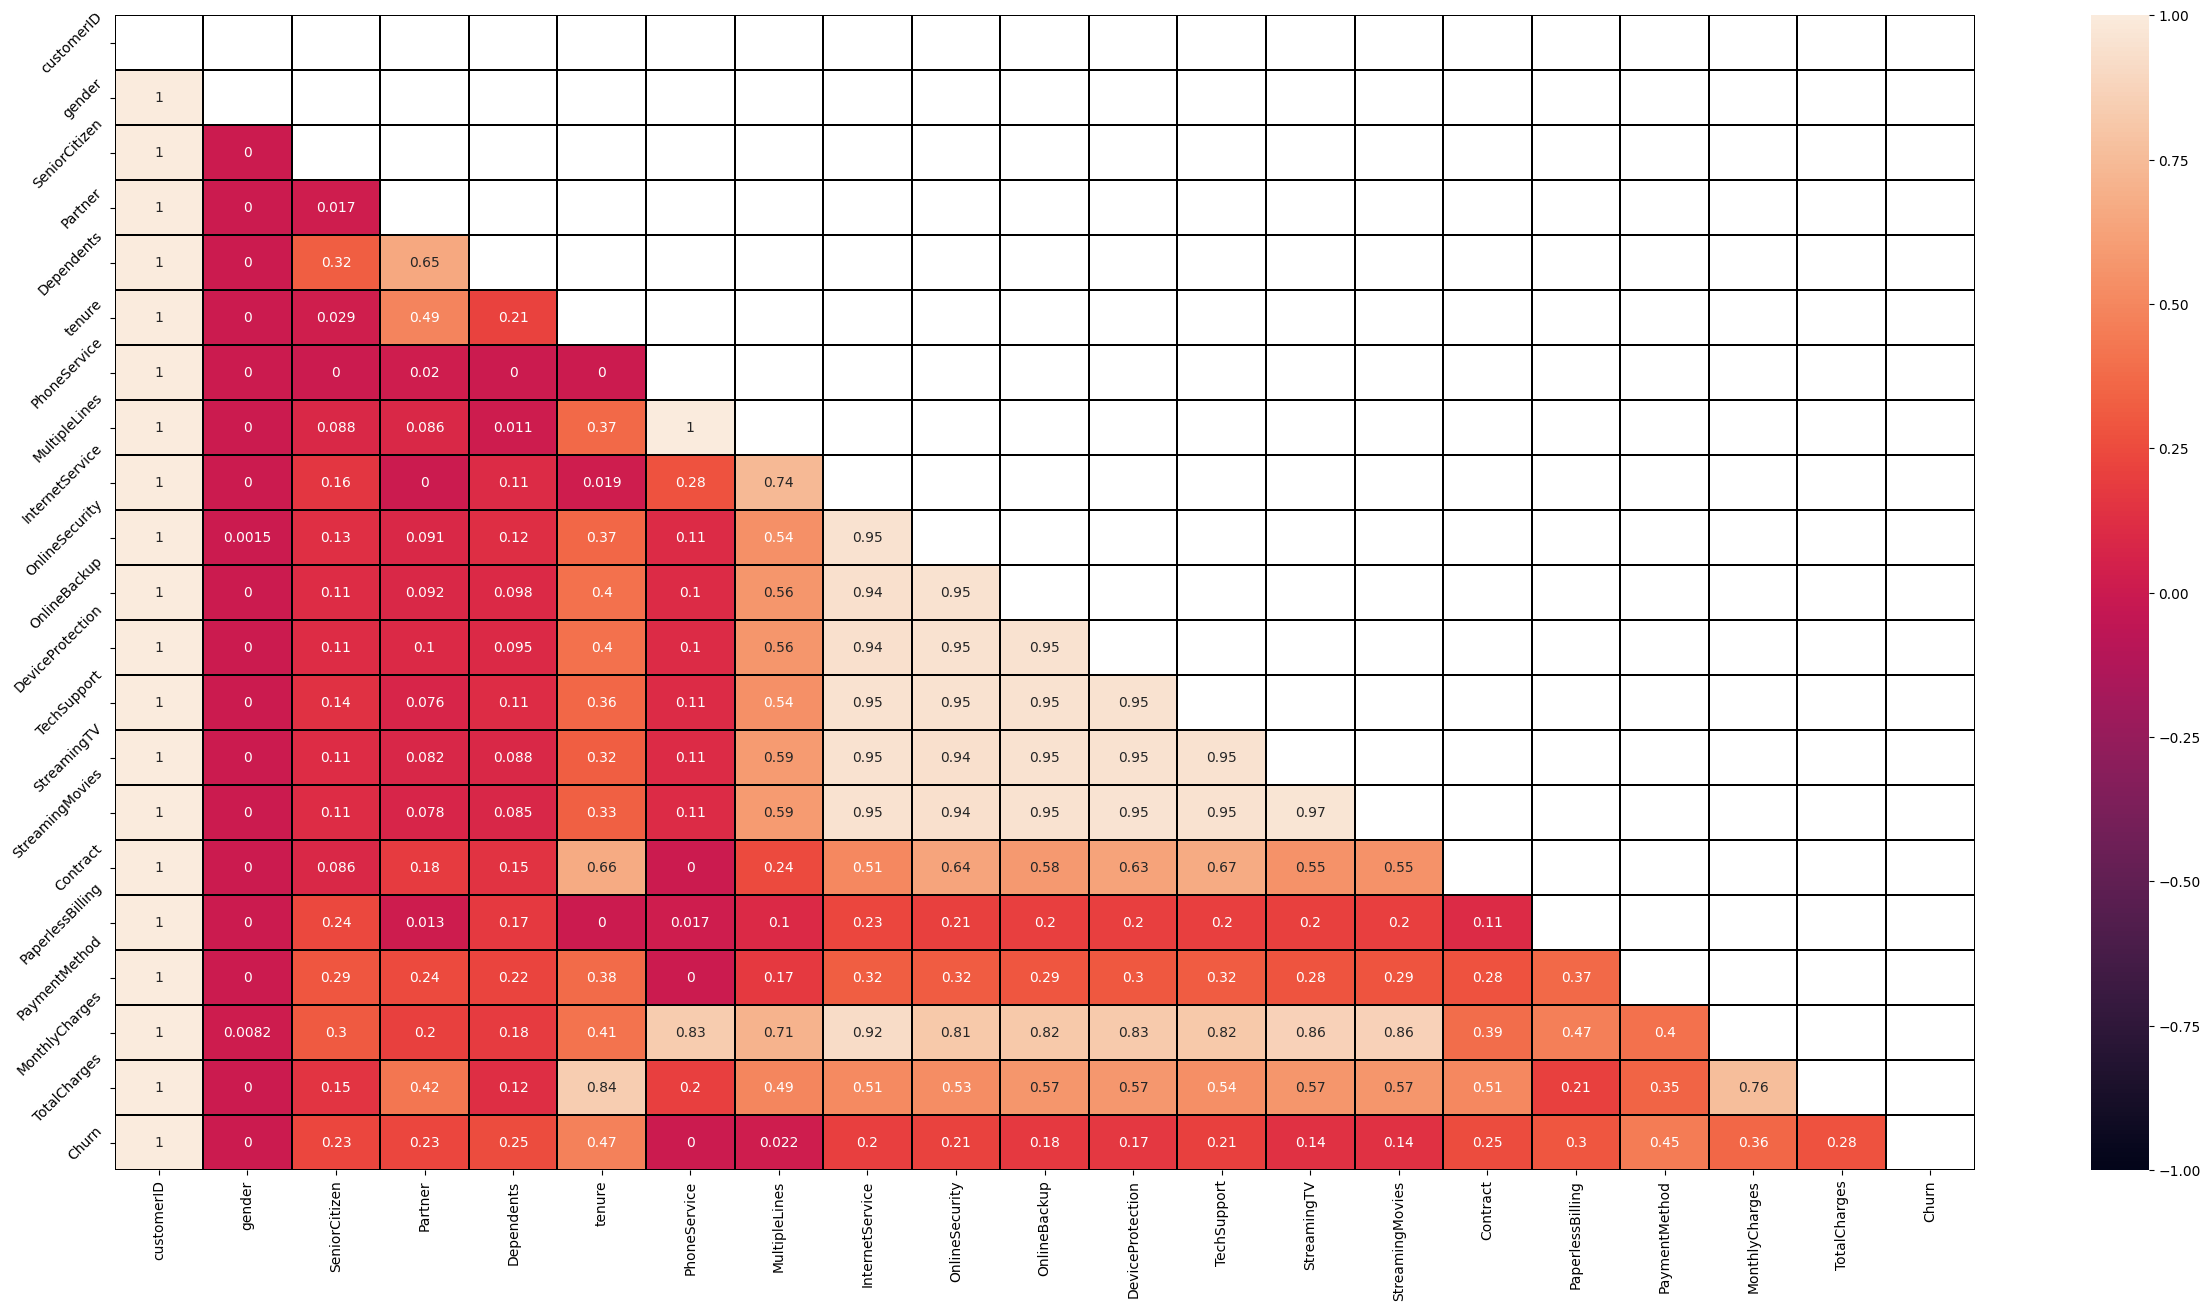

In [20]:
# visualization correlation

triangle_mask = np.zeros_like(df2_corr_phik, dtype=np.bool)
triangle_mask[np.triu_indices_from(triangle_mask)] = True
plt.figure(figsize = (30,15))
sns.heatmap(data = df2_corr_phik, linewidths=.1, linecolor='black', vmin = -1, vmax = 1, mask = triangle_mask, annot = True)
plt.yticks(rotation=45);

- So what: List of variables contains positive correlation with target (Churn) variable

    - tenure
    - paymentmetody
    - monthlyCharges
    - paperlessbilling
    - TotalCharges
    - contract
    - Dependents
    - partner
    - SeniorCitizen
    - OnlineSecurity
    - TechSupport
    - InternetService
    - OnlineBackup
    - DeviceProtection
    - StreamingTV
    - StreamingMovies

- The problem is a multicolinearity between variables, atention in the modeling problem machine learning

### - Cramer V analysis
- Is a measure of association between two **nominal variables**, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic

In [21]:
# select nominal variables and drop customerID for CRAMER V analysis
df_cramer = df2.select_dtypes(exclude=['int','float']).drop(['customerID'], axis=1)

In [22]:
# transform nominal/ordinal/categorical variables in Encoder labels for continue analysis

label = LabelEncoder()
df_cramer_encoded = pd.DataFrame() 

for i in df_cramer.columns :
  df_cramer_encoded[i] = label.fit_transform(df_cramer[i])

In [23]:
df_cramer_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [24]:
# bulding the cramer v matrix relation
rows = []

for var1 in df_cramer_encoded:
  col = []
  
  for var2 in df_cramer_encoded:

    cramers = cramers_V(df_cramer_encoded[var1], df_cramer_encoded[var2]) # Cramer's V test

    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  

  rows.append(col)
  
cramers_results = np.array(rows)

df_cramer_results = pd.DataFrame(cramers_results, columns = df_cramer_encoded.columns, index = df_cramer_encoded.columns)

In [25]:
df_cramer_results

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
gender,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SeniorCitizen,0.0,1.00,0.00,0.04,0.00,0.02,0.07,0.04,0.03,0.03,0.05,0.03,0.04,0.02,0.02,0.04,0.02
Partner,0.0,0.00,1.00,0.20,0.00,0.02,0.00,0.02,0.02,0.03,0.02,0.02,0.02,0.09,0.00,0.03,0.02
Dependents,0.0,0.04,0.20,1.00,0.00,0.00,0.03,0.04,0.03,0.02,0.03,0.02,0.02,0.06,0.01,0.02,0.03
PhoneService,0.0,0.00,0.00,0.00,1.00,1.00,0.20,0.03,0.03,0.03,0.03,0.03,0.03,0.00,0.00,0.00,0.00
MultipleLines,0.0,0.02,0.02,0.00,1.00,1.00,0.16,0.05,0.06,0.06,0.05,0.07,0.07,0.01,0.03,0.03,0.00
InternetService,0.0,0.07,0.00,0.03,0.20,0.16,1.00,0.52,0.50,0.50,0.52,0.51,0.51,0.04,0.14,0.10,0.10
OnlineSecurity,0.0,0.04,0.02,0.04,0.03,0.05,0.52,1.00,0.52,0.51,0.54,0.50,0.50,0.09,0.12,0.09,0.12
OnlineBackup,0.0,0.03,0.02,0.03,0.03,0.06,0.50,0.52,1.00,0.52,0.52,0.51,0.51,0.07,0.10,0.08,0.09
DeviceProtection,0.0,0.03,0.03,0.02,0.03,0.06,0.50,0.51,0.52,1.00,0.53,0.54,0.54,0.09,0.10,0.08,0.08


<Axes: >

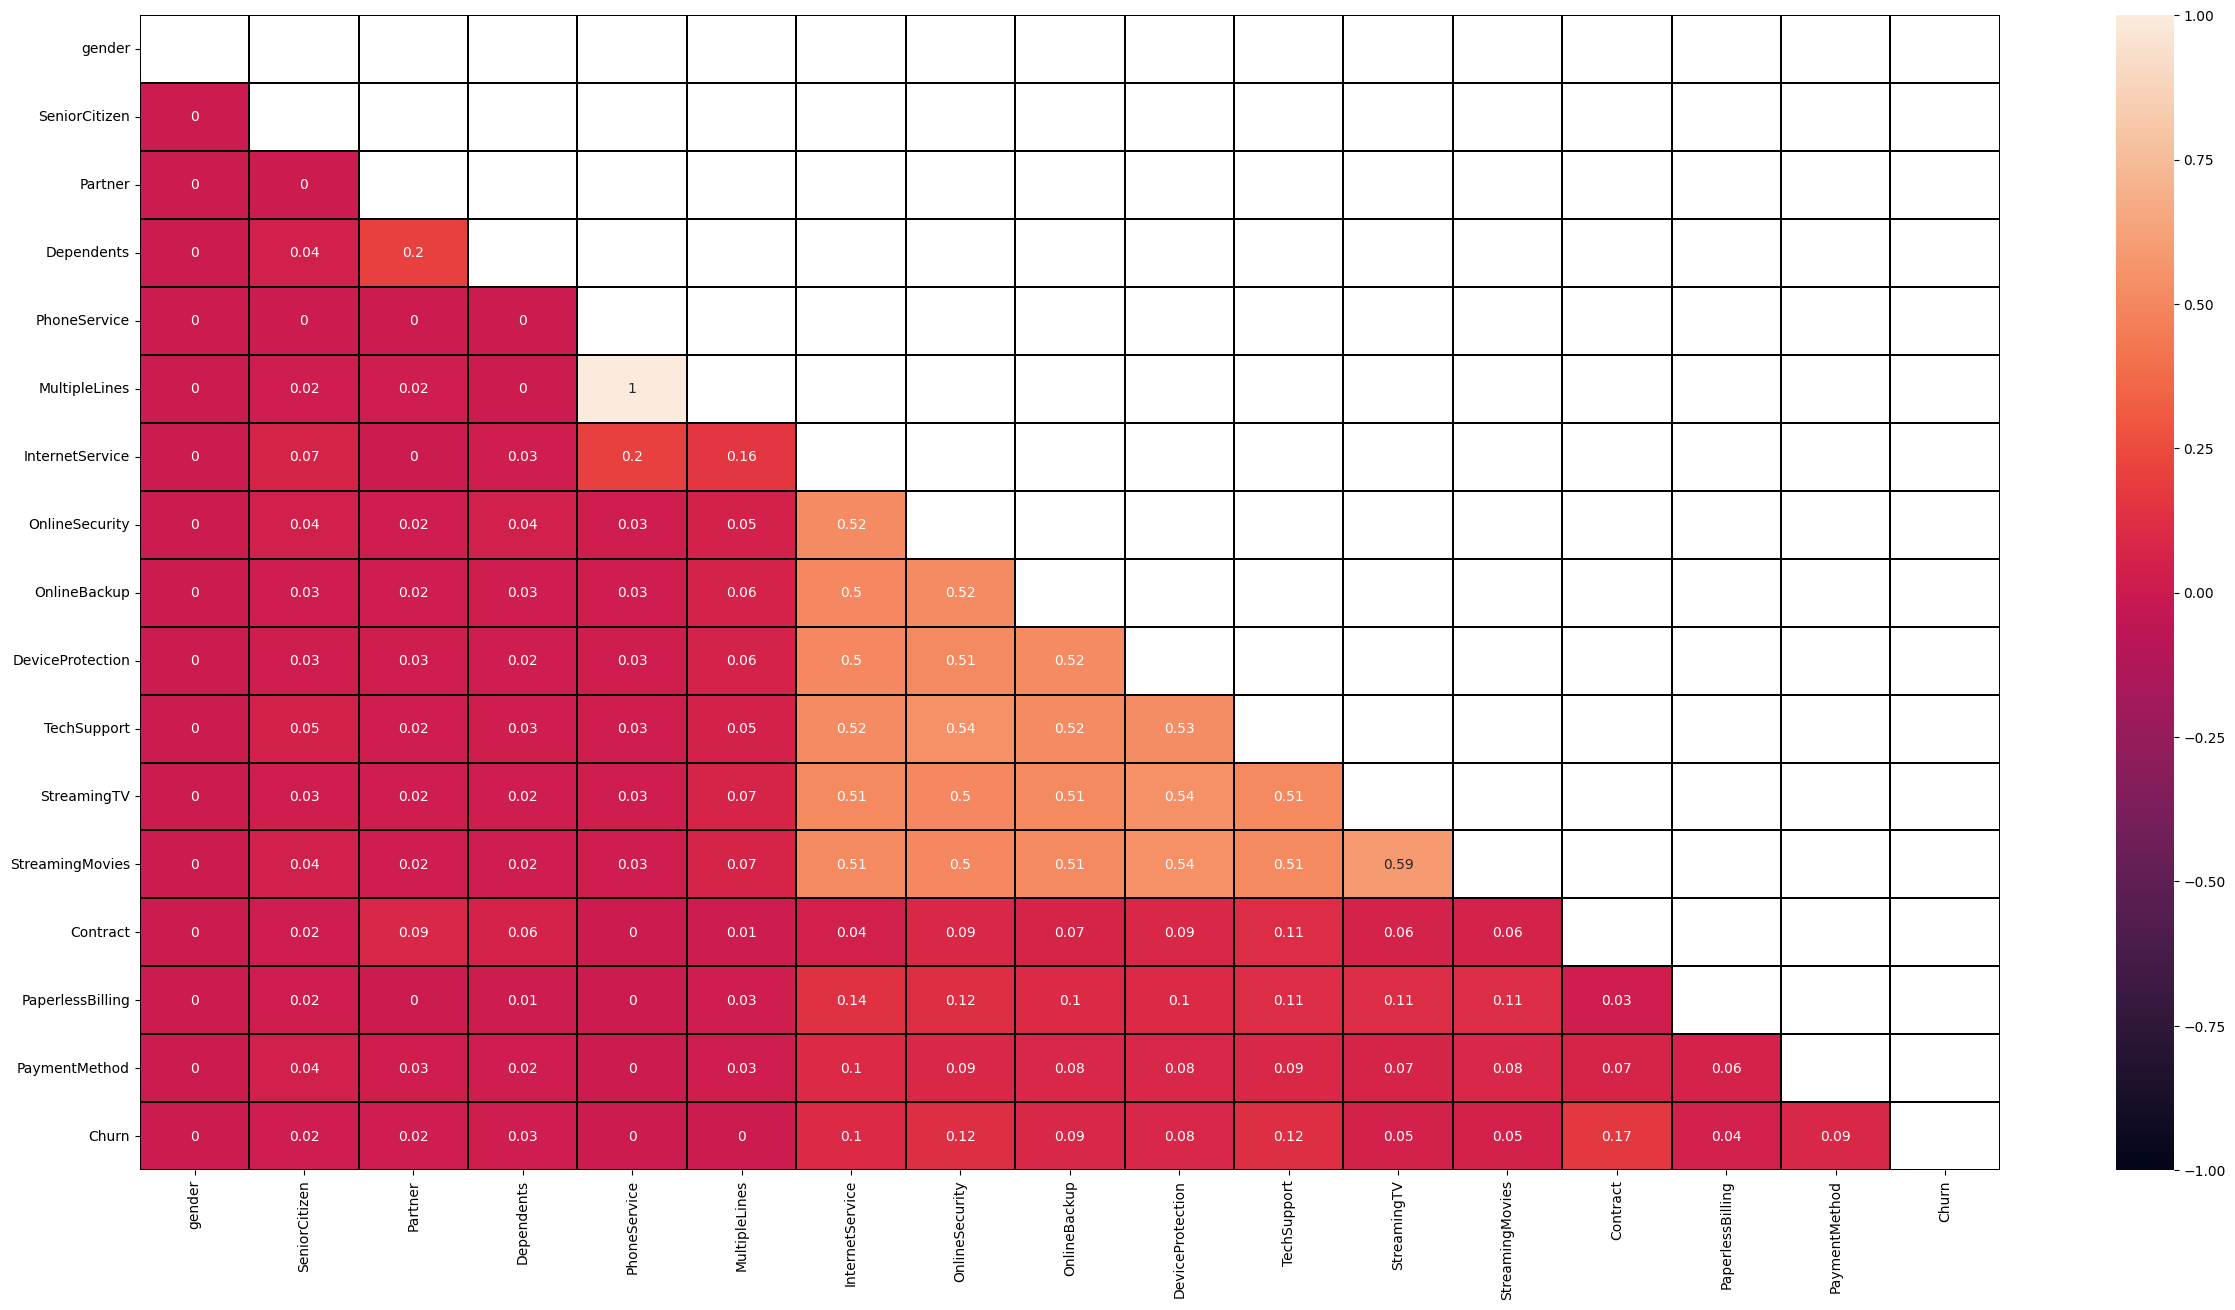

In [26]:
# visualize heatmap
triangle_mask = np.zeros_like(df_cramer_results, dtype=np.bool_)
triangle_mask[np.triu_indices_from(triangle_mask)] = True

plt.figure(figsize = (30,15))
sns.heatmap(data = df_cramer_results, linewidths=.1, linecolor='black', vmin = -1, vmax = 1, mask = triangle_mask, annot = True)

    - So what of analysis:
        - Focus on **Churn** variable:
            - Contract haves 0.17 cramer v assosiation
            - TechSupport and OnlineSecurity haves 0.12 cramer v assosiation
            - PaymentMethod haves 0.09 cramer v assosiation

## Bivariate analysis
- Countplots

In [27]:
# select categorical variables and plot categorical figures to compare the distribuition of the categories
df_count_plot = df2.select_dtypes(exclude=['int','float']).drop(['customerID'], axis=1)

In [28]:
df_count_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  Churn             7043 non-null   object
dtypes: object(17)


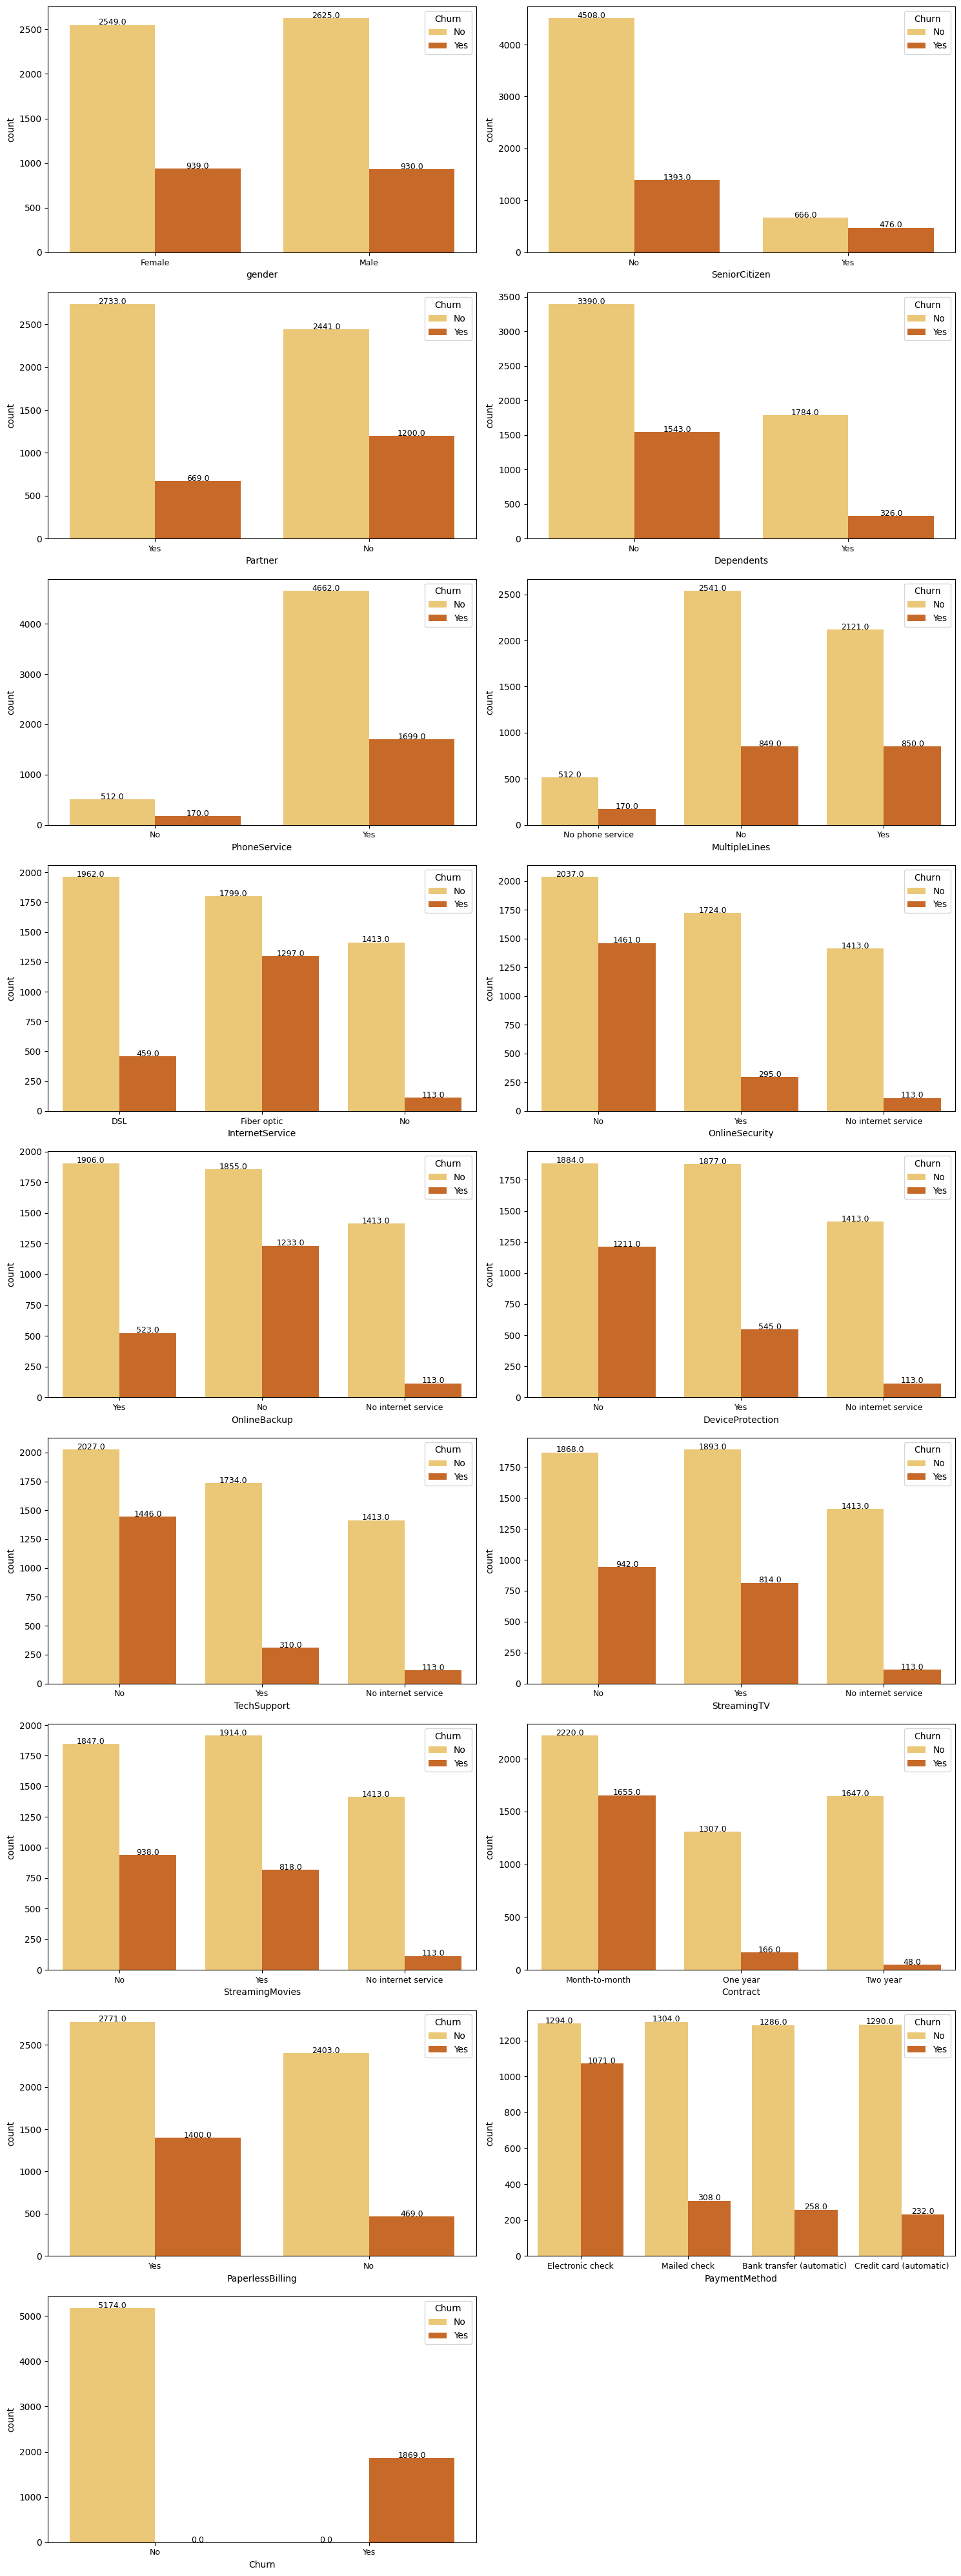

In [29]:
# visualizing Churn by categorical variables

plt.figure(figsize=(15,40))

for i in range(len(df_count_plot.columns)):

    plt.subplot(9,2,i+1)
    ax = sns.countplot(data=df_count_plot, x = df_count_plot[df_count_plot.columns[i]], hue = "Churn", palette='YlOrBr')

    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 9)

    plt.xticks(fontsize=9)
    plt.tight_layout();

- So what of this categorigal variables grouped by Churn target

    - The churn from gender is balanced !;
    - No partner is most frequente to Churn;
    - More frequent churn when peoples not is SeniorCitizen;
    - No Dependents is most frequent to churn;
    - For those who have PhoneService, Churn is more frequent;
    - More frequent churn when InternetService is fiber optic;
    - More frequent churn when peoples not have a OnlineSecurity ;
    - More frequent churn when peoples not have a OnlineBackup;
    - More frequent churn when peoples not have a DeviceProtection; 
    - More frequent churn when peoples not have a TechSupport; 
    - More frequent churn when peoples not have a StreamingTV;
    - More frequent churn when peoples not have a StramingMovies;
    - More frequent churn when peoples have a Contract Month-to-month;
    - More frequent churn when peoples have a PaperlessBilling;
    - More frequent churn when peoples have a Electronic check how PaymentMethod;

## Univariate analysis

In [30]:
# for displot in numerical variables

df_num = df2.select_dtypes(exclude=['object'])

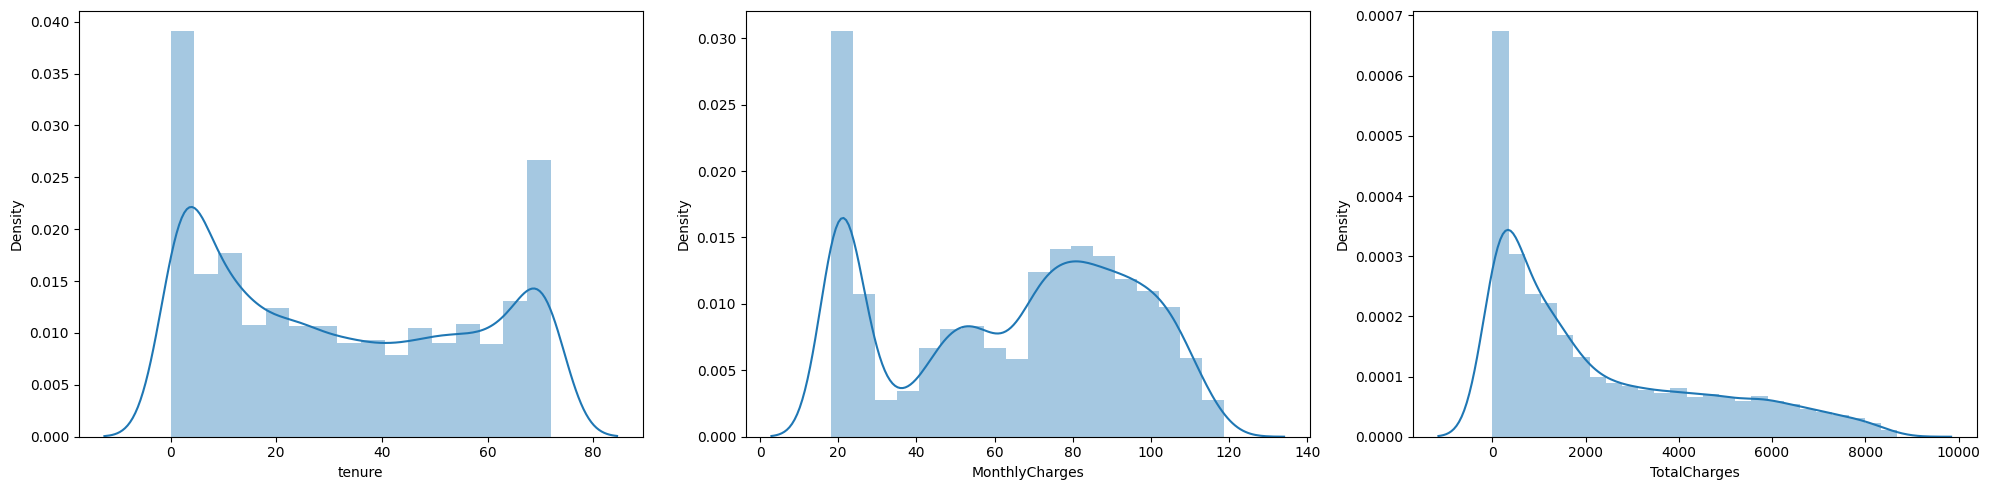

In [31]:
plt.figure(figsize=(20,5))

for i in range(len(df_num.columns)):
    plt.subplot(1,3,i+1)
    sns.distplot(df_num[df_num.columns[i]], kde=True)
    plt.tight_layout()
plt.show();

- So what numerical variables
    - tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.
    - TotalCharges displays a positively exponential distribuition and most frequent total charges are from values ​​around 0 to 1000 dollars
    - Not normal distribuitions. Needs scaler vaariables in modeling pipeline

In [32]:
# Perform numerical features vs target (Churn)
df2.groupby(['Churn'])['tenure','MonthlyCharges','TotalCharges'].describe().T

Churn                          No          Yes
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2549.911442  1531.796094
               std    2329.954215  1890.822994
               min       0.000000    18.850000
               25%     572.900000   134.500000
               50%    1679.525000   703.550000
               75%    4262.850000  2331.300000
               max    8672.450000  8684.800000

- Highlights
    - Churn customers are a minority and therefore comprise a smaller number of products in possession
    - Churn customers have a higher average cost of monthly charges
    - churn customers have a lower total cost, but their minimum cost exceeds that of non-churn customers

# Response hypothesis

- Churn customers who have a monthly contract are the majority !

    - Yes, true hypothese ! Month-to-month contract represent 88% of churn 

In [33]:
df2.groupby(['Churn'])['Contract'].value_counts(normalize=True).to_frame()

Contract
Churn Contract                
No    Month-to-month  0.429068
      Two year        0.318322
      One year        0.252609
Yes   Month-to-month  0.885500
      One year        0.088818
      Two year        0.025682

- Churn customers who are married are the majority!

    - No, false hypothese ! the Partner represent 35% of Churn

In [34]:
df2.groupby(['Churn'])['Partner'].value_counts(normalize=True).to_frame()

Partner
Churn Partner          
No    Yes      0.528218
      No       0.471782
Yes   No       0.642055
      Yes      0.357945

- Churn customers who have phone service are the majority!

    - Yes, true ! the customer churn have phone service represent 90%

In [35]:
df2.groupby(['Churn'])['PhoneService'].value_counts(normalize=True).to_frame()

PhoneService
Churn PhoneService              
No    Yes               0.901044
      No                0.098956
Yes   Yes               0.909042
      No                0.090958

- Churn customers who do not have Device Protection are the majority!

    - Yes, true ! Churn customers who do not have Device Protection represent 64%

In [36]:
df2.groupby(['Churn'])['DeviceProtection'].value_counts(normalize=True).to_frame()

DeviceProtection
Churn DeviceProtection                     
No    No                           0.364128
      Yes                          0.362775
      No internet service          0.273096
Yes   No                           0.647940
      Yes                          0.291600
      No internet service          0.060460

- Churn customers who have a Payment Method such as Electronic Check are the majority!

    - Yes, true ! Churn customers who have a Payment Method such as Electronic Check are the majority represent 57%

In [37]:
df2.groupby(['Churn'])['PaymentMethod'].value_counts(normalize=True).to_frame()

PaymentMethod
Churn PaymentMethod                           
No    Mailed check                    0.252029
      Electronic check                0.250097
      Credit card (automatic)         0.249324
      Bank transfer (automatic)       0.248550
Yes   Electronic check                0.573034
      Mailed check                    0.164794
      Bank transfer (automatic)       0.138042
      Credit card (automatic)         0.124131

# Next step 
    - send report in presentation or email to Telco SA with insigths and tests hyphotesis.

[PPT](https://docs.google.com/presentation/d/1kIHjwswOKo1i1d0BaC9MPJec7diMbCGNuMGxVNxI5ik/edit?usp=sharing)